In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import ensemble, preprocessing, metrics
from sklearn.metrics import classification_report, confusion_matrix

from keras.utils import np_utils
np.random.seed(10)
import csv

In [2]:
SDNdata = pd.read_csv("C:\pythonwork\dataset_sdn.csv")
print(SDNdata.describe())

                  dt         switch       pktcount     bytecount  \
count  104345.000000  104345.000000  104345.000000  1.043450e+05   
mean    17927.514169       4.214260   52860.954746  3.818660e+07   
std     11977.642655       1.956327   52023.241460  4.877748e+07   
min      2488.000000       1.000000       0.000000  0.000000e+00   
25%      7098.000000       3.000000     808.000000  7.957600e+04   
50%     11905.000000       4.000000   42828.000000  6.471930e+06   
75%     29952.000000       5.000000   94796.000000  7.620354e+07   
max     42935.000000      10.000000  260006.000000  1.471280e+08   

                 dur      dur_nsec       tot_dur          flows  \
count  104345.000000  1.043450e+05  1.043450e+05  104345.000000   
mean      321.497398  4.613880e+08  3.218865e+11       5.654234   
std       283.518232  2.770019e+08  2.834029e+11       2.950036   
min         0.000000  0.000000e+00  0.000000e+00       2.000000   
25%       127.000000  2.340000e+08  1.270000e+11    

# 資料前處理

In [3]:
SDNdata.shape

(104345, 23)

In [4]:
#先把NULL值的資料Drop掉
SDNdata.dropna(inplace=True)
SDNdata.shape

(103839, 23)

In [5]:
#檢查還有沒有NULL
SDNdata.isnull().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [6]:
SDNdata['src'].value_counts()

10.0.0.3     11395
10.0.0.7     10291
10.0.0.10     9593
10.0.0.1      8627
10.0.0.12     8081
10.0.0.2      8010
10.0.0.5      7291
10.0.0.9      7165
10.0.0.11     6383
10.0.0.4      5973
10.0.0.8      5210
10.0.0.6      2740
10.0.0.18     2590
10.0.0.13     2484
10.0.0.14     2265
10.0.0.15     1858
10.0.0.16     1789
10.0.0.20     1114
10.0.0.17      980
Name: src, dtype: int64

In [7]:
SDNdata['dst'].value_counts()

10.0.0.7     18020
10.0.0.8     15587
10.0.0.5     14876
10.0.0.3     12855
10.0.0.9      6318
10.0.0.12     5635
10.0.0.2      4990
10.0.0.1      4645
10.0.0.4      3963
10.0.0.10     3924
10.0.0.11     3370
10.0.0.14     2007
10.0.0.15     1765
10.0.0.16     1684
10.0.0.6      1590
10.0.0.13     1076
10.0.0.18      790
10.0.0.17      744
Name: dst, dtype: int64

In [8]:
SDNdata['Protocol'].value_counts()

ICMP    41321
UDP     33082
TCP     29436
Name: Protocol, dtype: int64

In [9]:
len(SDNdata)

103839

In [10]:
fe=SDNdata.groupby('Protocol').size()/len(SDNdata)
SDNdata.loc[:,'Protocol']=SDNdata['Protocol'].map(fe)

In [11]:
SDNdata['Protocol'].value_counts()

0.397933    41321
0.318589    33082
0.283477    29436
Name: Protocol, dtype: int64

In [12]:
fe=SDNdata.groupby('dst').size()/len(SDNdata)
SDNdata.loc[:,'dst']=SDNdata['dst'].map(fe)

In [13]:
SDNdata['dst'].value_counts()

0.173538    18020
0.150107    15587
0.143260    14876
0.123797    12855
0.060844     6318
0.054267     5635
0.048055     4990
0.044733     4645
0.038165     3963
0.037789     3924
0.032454     3370
0.019328     2007
0.016997     1765
0.016217     1684
0.015312     1590
0.010362     1076
0.007608      790
0.007165      744
Name: dst, dtype: int64

In [14]:
fe=SDNdata.groupby('src').size()/len(SDNdata)
SDNdata.loc[:,'src']=SDNdata['src'].map(fe)

In [15]:
SDNdata['dst'].value_counts()

0.173538    18020
0.150107    15587
0.143260    14876
0.123797    12855
0.060844     6318
0.054267     5635
0.048055     4990
0.044733     4645
0.038165     3963
0.037789     3924
0.032454     3370
0.019328     2007
0.016997     1765
0.016217     1684
0.015312     1590
0.010362     1076
0.007608      790
0.007165      744
Name: dst, dtype: int64

In [16]:
#把資料分為屬性和標籤，然後20%測試80%訓練
x = SDNdata.drop('label', axis=1)
y = SDNdata['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=100)

In [17]:
x_train.shape

(83071, 22)

In [18]:
x_test.shape

(20768, 22)

In [19]:
y_train.shape

(83071,)

In [20]:
y_test.shape

(20768,)

In [21]:
#指定陣列
df_x_train =pd.DataFrame(x_train)
df_x_test =pd.DataFrame(x_test)
df_y_train =pd.DataFrame(y_train)
df_y_test =pd.DataFrame(y_test)

In [22]:
df_x_train.shape

(83071, 22)

In [23]:
df_x_test.shape

(20768, 22)

In [24]:
df_y_train.shape

(83071, 1)

In [25]:
df_y_test.shape

(20768, 1)

In [26]:
#正規化
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled_x_train=minmax_scale.fit_transform(df_x_train)
scaled_x_test=minmax_scale.fit_transform(df_x_test)
scaled_y_train=minmax_scale.fit_transform(df_y_train)
scaled_y_test=minmax_scale.fit_transform(df_y_test)

In [27]:
#1.MLP
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten


In [28]:
model = Sequential()

In [29]:
model.add(Dense(units=40, input_dim=22, 
                kernel_initializer='uniform', 
                activation='relu'))

In [30]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [31]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [32]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                920       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 3,111
Trainable params: 3,111
Non-trainable params: 0
_________________________________________________________________


In [35]:
start = process_time()
train_history =model.fit(x=scaled_x_train, 
                         y=scaled_y_train, 
                         validation_split=0.1, 
                         epochs=200, 
                         batch_size=1000,verbose=2)
stop = process_time()

Epoch 1/200
75/75 - 2s - loss: 0.6718 - accuracy: 0.6057 - val_loss: 0.6434 - val_accuracy: 0.6074
Epoch 2/200
75/75 - 0s - loss: 0.5587 - accuracy: 0.6481 - val_loss: 0.4800 - val_accuracy: 0.7096
Epoch 3/200
75/75 - 0s - loss: 0.4175 - accuracy: 0.7682 - val_loss: 0.3585 - val_accuracy: 0.8173
Epoch 4/200
75/75 - 0s - loss: 0.3128 - accuracy: 0.8649 - val_loss: 0.2780 - val_accuracy: 0.9006
Epoch 5/200
75/75 - 0s - loss: 0.2481 - accuracy: 0.9156 - val_loss: 0.2228 - val_accuracy: 0.9230
Epoch 6/200
75/75 - 0s - loss: 0.2069 - accuracy: 0.9276 - val_loss: 0.1919 - val_accuracy: 0.9337
Epoch 7/200
75/75 - 0s - loss: 0.1771 - accuracy: 0.9378 - val_loss: 0.1679 - val_accuracy: 0.9375
Epoch 8/200
75/75 - 0s - loss: 0.1578 - accuracy: 0.9431 - val_loss: 0.1567 - val_accuracy: 0.9432
Epoch 9/200
75/75 - 0s - loss: 0.1446 - accuracy: 0.9471 - val_loss: 0.1404 - val_accuracy: 0.9478
Epoch 10/200
75/75 - 0s - loss: 0.1336 - accuracy: 0.9510 - val_loss: 0.1325 - val_accuracy: 0.9531
Epoch 11/

75/75 - 0s - loss: 0.0507 - accuracy: 0.9776 - val_loss: 0.0497 - val_accuracy: 0.9792
Epoch 84/200
75/75 - 0s - loss: 0.0476 - accuracy: 0.9795 - val_loss: 0.0517 - val_accuracy: 0.9786
Epoch 85/200
75/75 - 0s - loss: 0.0497 - accuracy: 0.9788 - val_loss: 0.0466 - val_accuracy: 0.9781
Epoch 86/200
75/75 - 0s - loss: 0.0476 - accuracy: 0.9790 - val_loss: 0.0491 - val_accuracy: 0.9794
Epoch 87/200
75/75 - 0s - loss: 0.0495 - accuracy: 0.9784 - val_loss: 0.0460 - val_accuracy: 0.9792
Epoch 88/200
75/75 - 0s - loss: 0.0450 - accuracy: 0.9807 - val_loss: 0.0529 - val_accuracy: 0.9782
Epoch 89/200
75/75 - 0s - loss: 0.0480 - accuracy: 0.9792 - val_loss: 0.0573 - val_accuracy: 0.9745
Epoch 90/200
75/75 - 0s - loss: 0.0486 - accuracy: 0.9787 - val_loss: 0.0465 - val_accuracy: 0.9791
Epoch 91/200
75/75 - 0s - loss: 0.0458 - accuracy: 0.9799 - val_loss: 0.0458 - val_accuracy: 0.9780
Epoch 92/200
75/75 - 0s - loss: 0.0462 - accuracy: 0.9801 - val_loss: 0.0474 - val_accuracy: 0.9787
Epoch 93/200


Epoch 165/200
75/75 - 0s - loss: 0.0396 - accuracy: 0.9830 - val_loss: 0.0397 - val_accuracy: 0.9818
Epoch 166/200
75/75 - 0s - loss: 0.0399 - accuracy: 0.9827 - val_loss: 0.0420 - val_accuracy: 0.9809
Epoch 167/200
75/75 - 0s - loss: 0.0401 - accuracy: 0.9830 - val_loss: 0.0622 - val_accuracy: 0.9748
Epoch 168/200
75/75 - 0s - loss: 0.0414 - accuracy: 0.9819 - val_loss: 0.0510 - val_accuracy: 0.9770
Epoch 169/200
75/75 - 0s - loss: 0.0415 - accuracy: 0.9819 - val_loss: 0.0411 - val_accuracy: 0.9798
Epoch 170/200
75/75 - 0s - loss: 0.0390 - accuracy: 0.9831 - val_loss: 0.0421 - val_accuracy: 0.9809
Epoch 171/200
75/75 - 0s - loss: 0.0390 - accuracy: 0.9835 - val_loss: 0.0420 - val_accuracy: 0.9801
Epoch 172/200
75/75 - 0s - loss: 0.0390 - accuracy: 0.9832 - val_loss: 0.0453 - val_accuracy: 0.9787
Epoch 173/200
75/75 - 0s - loss: 0.0399 - accuracy: 0.9826 - val_loss: 0.0392 - val_accuracy: 0.9823
Epoch 174/200
75/75 - 0s - loss: 0.0397 - accuracy: 0.9828 - val_loss: 0.0443 - val_accurac

In [36]:
print("Time(s):",stop-start)

Time(s): 82.921875


In [37]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

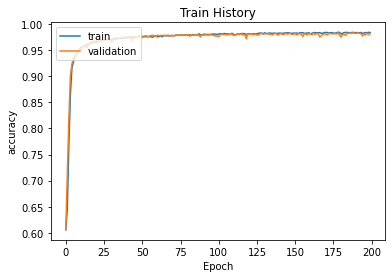

In [38]:
show_train_history(train_history,'accuracy','val_accuracy')

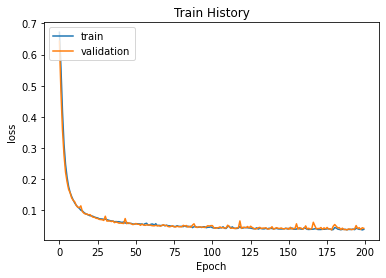

In [39]:
show_train_history(train_history,'loss','val_loss')

In [40]:
scores=model.evaluate(scaled_x_test,scaled_y_test)#使用model.evaluate評估模型準確率，評估結果存在scores
print()
print('accuracy=',scores[1])

649/649 [==============================] - 2s 2ms/step - loss: 0.0407 - accuracy: 0.9826: 

accuracy= 0.9826174974441528
